<a href="https://colab.research.google.com/github/bdstel/Machine-Learning/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggle Username: **bradensteller**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, mean_squared_error
from sklearn.model_selection import ParameterGrid, RandomizedSearchCV, GridSearchCV, train_test_split

In [ ]:
train_data = pd.read_csv("/content/train.csv").drop(columns = ['id'])
test_data = pd.read_csv("/content/test.csv").drop(columns = ['id'])

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.22,37.77,40.0,494.0,114.0,547.0,135.0,2.8015,NEAR BAY,114800.0
1,-122.29,37.76,18.0,2873.0,763.0,1243.0,663.0,5.1702,NEAR BAY,265400.0
2,-118.48,34.23,29.0,3354.0,707.0,1752.0,650.0,4.5484,<1H OCEAN,239900.0
3,-122.19,37.80,48.0,1694.0,259.0,610.0,238.0,4.7440,NEAR BAY,257300.0
4,-121.93,36.63,33.0,1740.0,342.0,638.0,329.0,3.1912,NEAR OCEAN,319800.0
...,...,...,...,...,...,...,...,...,...,...
10315,-117.79,33.70,16.0,1416.0,249.0,636.0,244.0,5.1741,<1H OCEAN,227700.0
10316,-117.41,33.95,37.0,1586.0,283.0,675.0,305.0,2.9583,INLAND,132100.0
10317,-118.65,34.20,23.0,7480.0,1084.0,3037.0,1058.0,6.9223,<1H OCEAN,338400.0
10318,-118.00,34.12,37.0,1340.0,325.0,928.0,333.0,3.9219,INLAND,175000.0


This is not necessary for the assignment, but I want to plot the longitude and latitude on a scatterplot to see if it forms the shape of any notable place.

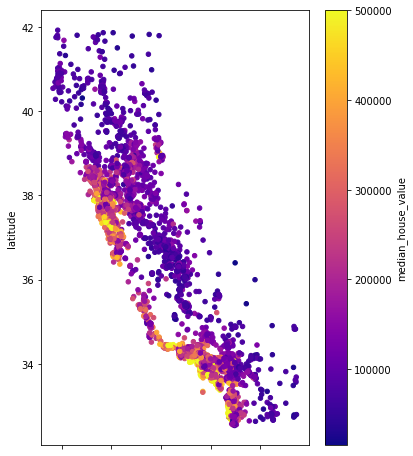

In [ ]:
train_data.plot.scatter('longitude', 'latitude', figsize = (6, 8), c='median_house_value', colormap='plasma')

---
# ***Data Manipulation***
---



# Missing Values

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           10320 non-null  float64
 1   latitude            10320 non-null  float64
 2   housing_median_age  10320 non-null  float64
 3   total_rooms         10320 non-null  float64
 4   total_bedrooms      10210 non-null  float64
 5   population          10320 non-null  float64
 6   households          10320 non-null  float64
 7   median_income       10320 non-null  float64
 8   ocean_proximity     10320 non-null  object 
 9   median_house_value  10320 non-null  float64
dtypes: float64(9), object(1)
memory usage: 806.4+ KB


There are 110 null values within the **total_bedrooms** column.

In [ ]:
train_data[train_data['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
34,-120.32,37.29,38.0,576.0,NaN,478.0,112.0,2.3382,INLAND,59600.0
86,-118.31,34.09,37.0,773.0,NaN,835.0,312.0,1.8576,<1H OCEAN,193800.0
294,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,NEAR BAY,186900.0
312,-118.12,34.08,35.0,2248.0,NaN,1762.0,622.0,3.0000,<1H OCEAN,253900.0
328,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,146500.0
...,...,...,...,...,...,...,...,...,...,...
9924,-116.66,32.79,13.0,843.0,NaN,918.0,152.0,6.2152,<1H OCEAN,240600.0
9967,-118.27,34.17,52.0,2010.0,NaN,908.0,326.0,6.9135,<1H OCEAN,374000.0
10001,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND,133600.0
10023,-118.43,34.20,28.0,3386.0,NaN,2240.0,737.0,3.0221,<1H OCEAN,290100.0


Because we do not know what these null values are supposed to be, I'll use the median of the non-null values for **total_bedrooms** as the value for each of the null entries

In [ ]:
non_null_data = train_data[train_data['total_bedrooms'].notnull()]
median = np.median(non_null_data['total_bedrooms'])
train_data['total_bedrooms'].fillna(median, inplace = True)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           10320 non-null  float64
 1   latitude            10320 non-null  float64
 2   housing_median_age  10320 non-null  float64
 3   total_rooms         10320 non-null  float64
 4   total_bedrooms      10320 non-null  float64
 5   population          10320 non-null  float64
 6   households          10320 non-null  float64
 7   median_income       10320 non-null  float64
 8   ocean_proximity     10320 non-null  object 
 9   median_house_value  10320 non-null  float64
dtypes: float64(9), object(1)
memory usage: 806.4+ KB


# Outliers

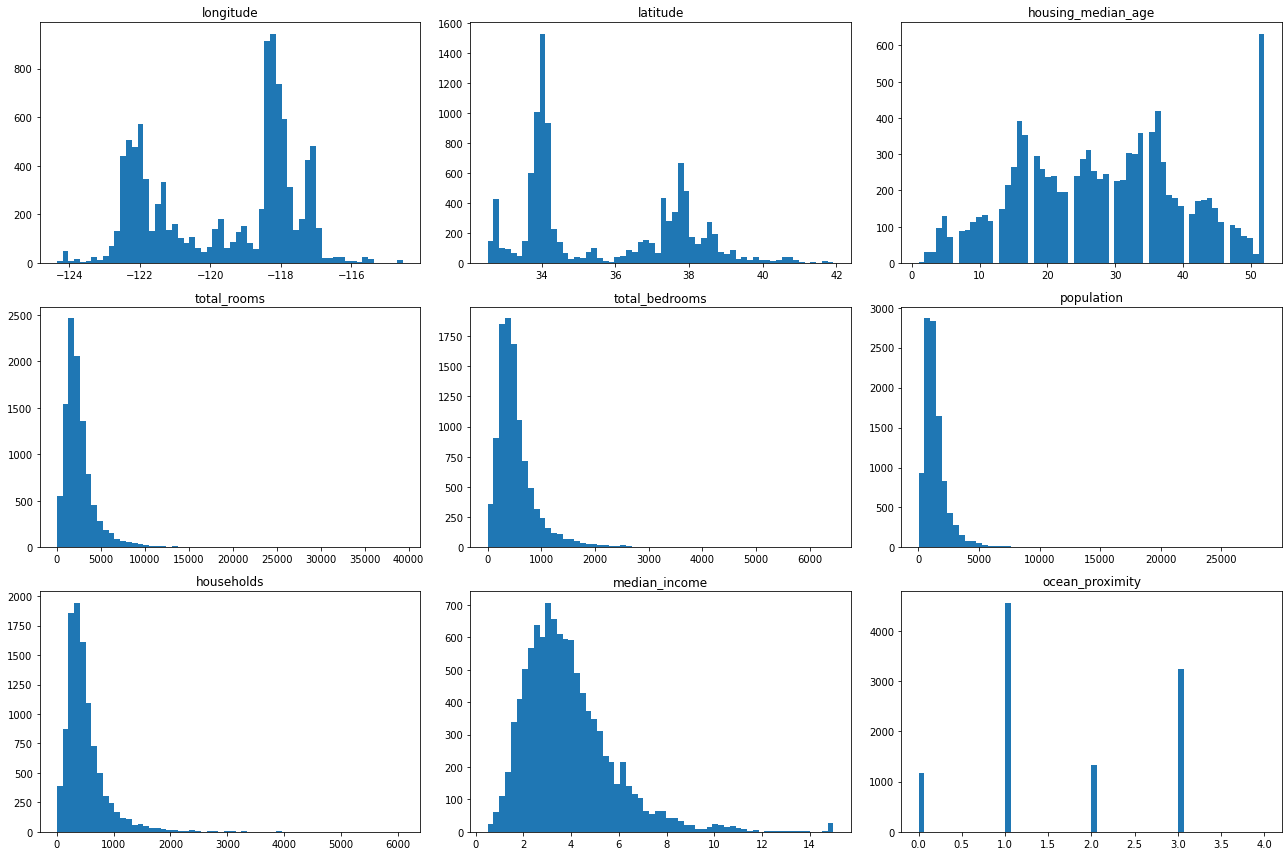

In [ ]:
train_data.iloc[:, :-1].hist(bins = 60, figsize = (18, 12), grid = False, layout = (3, 3))
plt.tight_layout()
plt.show()

While the median age has a huge spike around 52, this is not an outlier. It simply shows that there are a lot of locations in which there are middle-aged couples with no kids (or that perhaps the values were clamped, but this is what I like to think)

Most of the features follow an exponential distribution, and while this means that the data is left-skewed it does not determine the presence of outliers. Because of this, I don't need to do any clamping or data dropping to take care of outliers.

# Scaling

I do not believe that normalization or standardization would help in this scenario, as linear regression models predict using the values corresponding to a line of best fit. Because of this, I will not implement it in my approach.

# Other Preprocessing

Because the models work with numbers, and not words, I'll assign values to the different measures of **ocean_proximity**

In [ ]:
measures_list = []
for x in train_data['ocean_proximity']:
  if x not in measures_list:
    measures_list.append(x)

print(measures_list)

['NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'ISLAND']


In [ ]:
dummy_ints = {'NEAR BAY': 0, '<1H OCEAN': 1, 'NEAR OCEAN': 2, 'INLAND': 3, 'ISLAND': 4}
train_data['ocean_proximity'] = [dummy_ints[k] for k in train_data['ocean_proximity']]

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.22,37.77,40.0,494.0,114.0,547.0,135.0,2.8015,0,114800.0
1,-122.29,37.76,18.0,2873.0,763.0,1243.0,663.0,5.1702,0,265400.0
2,-118.48,34.23,29.0,3354.0,707.0,1752.0,650.0,4.5484,1,239900.0
3,-122.19,37.80,48.0,1694.0,259.0,610.0,238.0,4.7440,0,257300.0
4,-121.93,36.63,33.0,1740.0,342.0,638.0,329.0,3.1912,2,319800.0
...,...,...,...,...,...,...,...,...,...,...
10315,-117.79,33.70,16.0,1416.0,249.0,636.0,244.0,5.1741,1,227700.0
10316,-117.41,33.95,37.0,1586.0,283.0,675.0,305.0,2.9583,3,132100.0
10317,-118.65,34.20,23.0,7480.0,1084.0,3037.0,1058.0,6.9223,1,338400.0
10318,-118.00,34.12,37.0,1340.0,325.0,928.0,333.0,3.9219,3,175000.0


While it isn't continuous data like the other features, it will allow the model to be able to predict now.

---
# ***Models***
---

# Base Models

In [ ]:
def train_model(data, model, iterations):
  X = data.drop(columns = ['median_house_value'])
  y = data['median_house_value']

  rmse_dist = []
  for i in range(iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    model.fit(X_train, y_train)
    predict = model.predict(X_test)

    for i in range(len(predict)):
      if predict[i] < 0:
        predict[i] = 0
      elif predict[i] > 500000:
        predict[i] = 500000

    rmse_dist.append(mean_squared_error(y_test, predict, squared=False))

  plt.hist(np.array(rmse_dist), bins = 25)
  plt.title('Root Mean Squared Error Distribution')
  plt.show()
  print('Mean RMSE Value: ' + str(np.mean(rmse_dist)))

Within the model training function, I included a for loop that clamps the prediction values. Because of the way that linear models work, some of the values will end up being negative. As well as this, none of the median housing values from the training data were over 500,000, and so I decided to clamp the values between 0 and 500k.

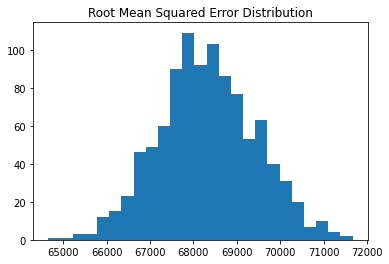

Mean RMSE Value: 68323.74141822028


In [ ]:
# Ordinary Least Squares
train_model(train_data, LinearRegression(), 1000)

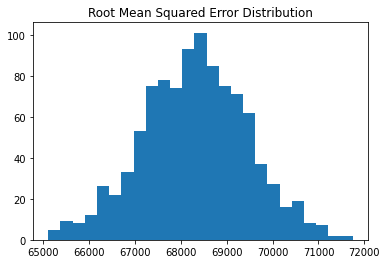

Mean RMSE Value: 68305.28141163963


In [ ]:
# Ridge
train_model(train_data, Ridge(), 1000)

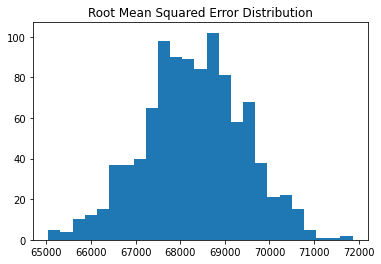

Mean RMSE Value: 68301.51859503206


In [ ]:
# Lasso
train_model(train_data, Lasso(), 1000)

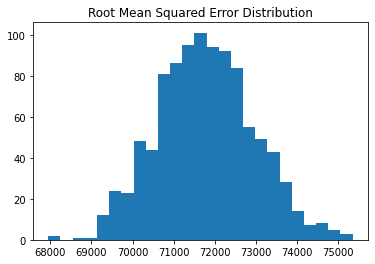

Mean RMSE Value: 71778.66780191696


In [ ]:
# Elastic Net
train_model(train_data, ElasticNet(), 1000)

All of the RMSE Score Distributions appear to follow the bell curve, and all of them give values whose differences are negligible (except Elastic Net, which has a worse mean score than the rest) when it comes to picking the model. Because of this, I'm picking the Ordinary Least Squares Regression model for the final prediction, since it gives me the lowest runtime and is tied for the best score.

# Final Training & Prediction

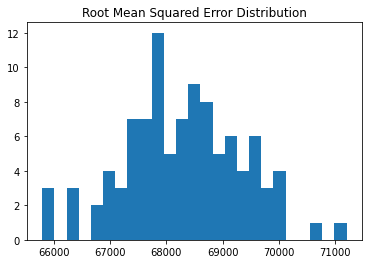

Mean RMSE Value: 68305.42093100198


In [ ]:
lr_model = LinearRegression()
train_model(train_data, lr_model, 100)

The model is now trained and ready to make the final prediction, however the test data is not.

In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.36,37.94,41.0,2591.0,585.0,1638.0,462.0,1.8220,NEAR BAY
1,-118.37,34.16,17.0,4150.0,1148.0,1808.0,1041.0,3.5051,<1H OCEAN
2,-118.29,33.95,40.0,2808.0,695.0,2357.0,627.0,1.9655,<1H OCEAN
3,-121.77,38.01,13.0,2983.0,534.0,1417.0,510.0,3.9861,INLAND
4,-118.26,34.08,45.0,2174.0,627.0,1992.0,557.0,2.5428,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
10315,-122.15,37.74,49.0,1325.0,277.0,764.0,282.0,3.3125,NEAR BAY
10316,-118.27,33.94,39.0,2078.0,561.0,1901.0,504.0,1.1468,<1H OCEAN
10317,-122.59,38.43,20.0,2791.0,546.0,785.0,512.0,3.4561,<1H OCEAN
10318,-122.04,37.37,33.0,2757.0,489.0,1201.0,481.0,5.0453,<1H OCEAN


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           10320 non-null  float64
 1   latitude            10320 non-null  float64
 2   housing_median_age  10320 non-null  float64
 3   total_rooms         10320 non-null  float64
 4   total_bedrooms      10223 non-null  float64
 5   population          10320 non-null  float64
 6   households          10320 non-null  float64
 7   median_income       10320 non-null  float64
 8   ocean_proximity     10320 non-null  object 
dtypes: float64(8), object(1)
memory usage: 725.8+ KB


Just as in the training data, the **ocean_proximity** feature needs to be converted into integers, and additionally the missing values in the test data need to be addressed. I'll use the same methods that I did in the training data to handle this.

In [ ]:
non_null_data = test_data[test_data['total_bedrooms'].notnull()]
median = np.median(non_null_data['total_bedrooms'])
test_data['total_bedrooms'].fillna(median, inplace = True)

In [ ]:
test_data['ocean_proximity'] = [dummy_ints[k] for k in test_data['ocean_proximity']]

The test data has now been engineered in the same way that the training data was, so it's time to predict.

In [ ]:
final_test_X = test_data

X = train_data.drop(columns = ['median_house_value'])
y = train_data['median_house_value']

lr_model.fit(X, y)
predictions = lr_model.predict(final_test_X)

As with the training data, I'll clamp the prediction values between 0 and 500,000

In [ ]:
for i in range(len(predictions)):
      if predictions[i] < 0:
        predictions[i] = 0
      elif predictions[i] > 500000:
        predictions[i] = 500000

In [ ]:
output = pd.DataFrame({'id': np.arange(0, 10320), 'median_house_value': predictions})
output = output.set_index('id')
print(output)
output.to_csv('my_submission.csv')

       median_house_value
id                       
0           163187.240433
1           262802.421869
2           147951.264965
3           175097.457087
4           178249.641859
...                   ...
10315       235759.715376
10316       116812.024535
10317       222045.356246
10318       293576.053059
10319       195060.531029

[10320 rows x 1 columns]
